In [ ]:
import pandas as pd

dfe = pd.read_csv("/content/merged_emails (1).csv")

In [ ]:
dfe.shape

(137677, 7)

In [ ]:
dfe.isnull().sum()

,0
sender,32964
receiver,34977
date,33139
subject,859
body,1
label,0
urls,32626


In [ ]:
dfe = dfe.drop(columns =['sender','receiver','date'],axis = 1)

In [ ]:
dfe.isnull().sum()

,0
subject,859
body,1
label,0
urls,32626


In [ ]:
dfe

,subject,body,label,urls
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0
...,...,...,...,...
137672,Job: just for you.,\n\n\n\nWhile we may have high ...,1,1.0
137673,the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1.0
137674,"Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1.0
137675,Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1.0


In [ ]:
dfe.nunique()

,0
subject,78344
body,135874
label,2
urls,2


In [ ]:
dfe.duplicated().sum()

np.int64(1801)

In [ ]:
dfe['body'].duplicated().sum()

np.int64(1802)

In [ ]:
dfe[dfe['body'].duplicated(keep=False)].head()


,subject,body,label,urls
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0
8,[Bug 5780] URI processing turns uuencoded stri...,http://issues.apache.org/SpamAssassin/show_bug...,0,1.0
15,RE: Trial IRC Certificate Application,"\nPlelim,\n\nJust to remind you that if a cert...",0,1.0
18,"Re: [opensuse] Why can't I use ""shutdown now"" ...",Carlos E. R. wrote: > -----BEGIN PGP SIGNED ME...,0,1.0
19,Re: Fwd: [opensuse] Re: openSUSE Boxed Editions,Steve Jacobs wrote: > ---------- Forwarded mes...,0,1.0


In [ ]:
dfe.duplicated(subset=['subject', 'body', 'label']).sum()


np.int64(1801)

In [ ]:
dfe = dfe.drop_duplicates(subset=['subject','body','label'])

In [ ]:
dfe.duplicated(subset=['subject', 'body', 'label']).sum()

np.int64(0)

In [ ]:
dfe['body'].duplicated().sum()

np.int64(1)

In [ ]:
dfe[dfe['body'].duplicated(keep=False)].head()

,subject,body,label,urls
73922,URGENT ASSISTANCE,\n\n,1,0.0
82985,An Invitation to Advertise on Freightmart!,\n\n,1,1.0


In [ ]:
dfe['label'].value_counts()

,count
label,
1,70724
0,65152


In [ ]:
len(dfe)

135876

In [ ]:
dfe.shape

(135876, 4)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000   # vocabulary size
max_len = 200       # max length per email

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dfe['clean_text'])

X = tokenizer.texts_to_sequences(dfe['clean_text'])
X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')

y = dfe['label'].values


KeyError: 'clean_text'

In [ ]:
dfe

,subject,body,label,urls
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0
...,...,...,...,...
137672,Job: just for you.,\n\n\n\nWhile we may have high ...,1,1.0
137673,the reply for your request for a job place [le...,\n\n\n\nWhile we may have high ...,1,1.0
137674,"Re: [R] Me again, about the horrible documenta...","For those who are interested, I just cook a li...",0,1.0
137675,Re: [R] RODBC problem,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,1.0


In [ ]:
# Imports
import re
import json
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from pathlib import Path

# ---------- 1) Cleaning utilities ----------
URL_RE = re.compile(r'(https?://\S+|www\.\S+)')
EMAIL_RE = re.compile(r'[\w\.-]+@[\w\.-]+\.\w+')
HTML_TAG_RE = re.compile(r'<[^>]+>')
MULTI_SPACE_RE = re.compile(r'\s+')

def clean_text(text, replace_urls_with="<URL>", replace_emails_with="<EMAIL>"):
    """
    Basic, robust cleaning:
    - Ensure string type
    - Remove HTML tags
    - Replace URLs and email addresses with special tokens
    - Lowercase
    - Normalize whitespace
    """
    if pd.isna(text):
        return ""
    s = str(text)
    s = HTML_TAG_RE.sub(' ', s)                    # remove html tags
    s = URL_RE.sub(' ' + replace_urls_with + ' ', s)  # replace urls
    s = EMAIL_RE.sub(' ' + replace_emails_with + ' ', s)  # replace emails
    s = s.lower()
    s = MULTI_SPACE_RE.sub(' ', s).strip()
    return s

# ---------- 2) Preprocess DataFrame ----------
def preprocess_df(dfe,
                  combine_subject_body=True,
                  subject_col='subject',
                  body_col='body',
                  urls_col='urls',
                  label_col='label'):
    """
    Returns a DataFrame with a 'text' column and 'label' column ready for tokenization.
    combine_subject_body: True => create text = "<SUBJ> {subject} <BODY> {body}"
    If you want separate handling later (e.g., two-channel model), set False.
    """
    df = dfe.copy()
    # Clean each column individually
    df['clean_subject'] = df[subject_col].apply(clean_text)
    df['clean_body'] = df[body_col].apply(clean_text)

    # If urls column exists, we can also normalize or append it as a token
    if urls_col in df.columns:
        df['clean_urls'] = df[urls_col].fillna('').astype(str).apply(lambda x: (' <URLS> ' + x) if x.strip() else '')
        # Optionally you could `extract domain` or count urls instead of embedding them; here we keep them as extra text.
    else:
        df['clean_urls'] = ''

    if combine_subject_body:
        # add explicit segment tokens so model can learn different patterns in subject vs body
        df['text'] = ("<SUBJ> " + df['clean_subject'] + " <BODY> " + df['clean_body'] + " " + df['clean_urls']).str.strip()
    else:
        # keep subject and body separate columns (useful for 2-input models)
        df['text_subject'] = df['clean_subject']
        df['text_body'] = df['clean_body']
        df['text_urls'] = df['clean_urls']
        # You can still create a combined field for baseline:
        df['text'] = ("<SUBJ> " + df['clean_subject'] + " <BODY> " + df['clean_body']).str.strip()

    # Ensure label is numeric (if categorical, convert)
    if df[label_col].dtype == 'object' or not np.issubdtype(df[label_col].dtype, np.number):
        df['label'] = pd.Categorical(df[label_col]).codes
    else:
        df['label'] = df[label_col].astype(int)

    return df[['text', 'label'] + [c for c in df.columns if c.startswith('clean_')]]

# ---------- 3) Tokenizer fitting & sequence creation ----------
def build_and_apply_tokenizer(texts,
                              vocab_size=None,
                              oov_token="<OOV>",
                              tokenizer_save_path=None,
                              filters=''):
    """
    - texts: iterable of text strings (fit on training texts ONLY)
    - vocab_size: if None, we let Tokenizer keep all words, then we will cap indices at desired vocab_size when building embedding later.
    - oov_token: token for out-of-vocab words
    - tokenizer_save_path: if provided, the tokenizer json will be saved there
    Returns tokenizer object.
    """
    # If you have a very large corpus consider using num_words=vocab_size when creating Tokenizer
    if vocab_size is None:
        tokenizer = Tokenizer(oov_token=oov_token, filters=filters)
    else:
        tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token, filters=filters)
    tokenizer.fit_on_texts(texts)
    # Optionally save tokenizer
    if tokenizer_save_path:
        tokenizer_json = tokenizer.to_json()
        Path(tokenizer_save_path).write_text(tokenizer_json, encoding='utf-8')
    return tokenizer

def texts_to_padded_sequences(tokenizer, texts, maxlen, padding='post', truncating='post', num_words=None):
    """
    Convert texts -> sequences -> padded arrays.
    num_words: if set, will cap token indices to num_words (useful to enforce vocab limit)
    """
    seqs = tokenizer.texts_to_sequences(texts)
    if num_words is not None:
        # cap indices: any index >= num_words becomes OOV (we map them to tokenizer.word_index[oov_token])
        oov_index = tokenizer.word_index.get(tokenizer.oov_token)
        if oov_index is None:
            # fallback
            oov_index = 1
        capped_seqs = []
        for s in seqs:
            capped_s = [w if (w is not None and w < num_words) else oov_index for w in s]
            capped_seqs.append(capped_s)
        seqs = capped_seqs
    padded = pad_sequences(seqs, maxlen=maxlen, padding=padding, truncating=truncating)
    return padded

# ---------- 4) Utility to choose maxlen from dataset ----------
def choose_maxlen_from_texts(texts, percentile=95):
    """
    Compute token counts per text and return percentile-based maxlen.
    Use this to choose a good maxlen that covers most samples while avoiding huge padding.
    """
    # quick token count approximation using whitespace split after cleaning
    lens = [len(t.split()) for t in texts]
    return int(np.percentile(lens, percentile)), lens

# ---------- 5) Example wiring: train/val split, fit tokenizer, pad sequences ----------
def prepare_tokenized_dataset(df,
                              tokenizer_vocab=None,
                              maxlen=None,
                              test_size=0.1,
                              random_state=42,
                              tokenizer_save_path='tokenizer.json'):
    """
    Full wiring:
    - split into train/val
    - fit tokenizer on train.text
    - choose maxlen if None (95th percentile)
    - convert train/val to padded sequences
    Returns: tokenizer, X_train, X_val, y_train, y_val, stats dict
    """
    train_df, val_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['label'])
    # Fit tokenizer on training data only
    tokenizer = build_and_apply_tokenizer(train_df['text'].tolist(), vocab_size=tokenizer_vocab, tokenizer_save_path=tokenizer_save_path)

    # choose maxlen if not provided
    if maxlen is None:
        chosen_maxlen, lens = choose_maxlen_from_texts(train_df['text'].tolist(), percentile=95)
        maxlen = chosen_maxlen
    else:
        lens = [len(t.split()) for t in train_df['text'].tolist()]

    # convert to sequences
    X_train = texts_to_padded_sequences(tokenizer, train_df['text'].tolist(), maxlen=maxlen, num_words=tokenizer_vocab)
    X_val = texts_to_padded_sequences(tokenizer, val_df['text'].tolist(), maxlen=maxlen, num_words=tokenizer_vocab)

    y_train = train_df['label'].values
    y_val = val_df['label'].values

    stats = {
        'vocab_size_reported_by_tokenizer': len(tokenizer.word_index) + 1, # +1 for padding index 0
        'chosen_maxlen': maxlen,
        'train_text_count': len(train_df),
        'val_text_count': len(val_df),
        'train_length_percentile_95': int(np.percentile(lens, 95))
    }

    return tokenizer, X_train, X_val, y_train, y_val, stats


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, GlobalMaxPooling1D,
                                     Concatenate, Dense, Dropout, Bidirectional, LSTM)
from tensorflow.keras.optimizers import Adam

def build_cnn_lstm_singleinput(vocab_size, embedding_dim, maxlen,
                               cnn_filters=128, kernel_sizes=(3,4,5),
                               lstm_units=128, dropout=0.3, num_classes=1):
    """
    Single text input model. Use binary sigmoid for num_classes==1 else softmax for >1.
    """
    # Input
    text_in = Input(shape=(maxlen,), name='text_input')

    # Embedding (index 0 reserved for padding)
    emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, name='embedding')(text_in)

    # CNN towers for multiple kernel sizes
    conv_pools = []
    for k in kernel_sizes:
        c = Conv1D(filters=cnn_filters, kernel_size=k, activation='relu', padding='valid')(emb)
        p = GlobalMaxPooling1D()(c)
        conv_pools.append(p)
    cnn_concat = Concatenate()(conv_pools) if len(conv_pools) > 1 else conv_pools[0]

    # Optional dense before LSTM (here we pass CNN features to LSTM as context — another approach is CNN -> pooling -> dense -> classify)
    # Instead we'll use CNN features + a BiLSTM operating on embeddings
    blstm = Bidirectional(LSTM(lstm_units, return_sequences=False))(emb)  # run LSTM on embeddings (not on CNN output)
    merged = Concatenate()([cnn_concat, blstm])

    x = Dropout(dropout)(merged)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout)(x)

    if num_classes == 1:
        out = Dense(1, activation='sigmoid', name='output')(x)
        loss = 'binary_crossentropy'
        metrics = ['accuracy']
    else:
        out = Dense(num_classes, activation='softmax', name='output')(x)
        loss = 'sparse_categorical_crossentropy'
        metrics = ['sparse_categorical_accuracy']

    model = Model(inputs=[text_in], outputs=[out])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss=loss, metrics=metrics)
    return model


In [ ]:
def preprocess_df_optionA(df,
                          subject_col='subject',
                          body_col='body',
                          urls_col='urls',
                          label_col='label'):
    """
    Preprocess for Option A:
    Combine subject+body; if urls==1, append <HAS_URL> token.
    """
    df = df.copy()
    df['clean_subject'] = df[subject_col].apply(clean_text)
    df['clean_body'] = df[body_col].apply(clean_text)

    # combine subject + body
    df['text'] = "<SUBJ> " + df['clean_subject'] + " <BODY> " + df['clean_body']

    # append the <HAS_URL> token where urls==1
    if urls_col in df.columns:
        df['text'] = np.where(df[urls_col] == 1, df['text'] + " <HAS_URL>", df['text'])

    # numeric labels
    if df[label_col].dtype == 'object' or not np.issubdtype(df[label_col].dtype, np.number):
        df['label'] = pd.Categorical(df[label_col]).codes
    else:
        df['label'] = df[label_col].astype(int)

    return df[['text', 'label']]


In [ ]:
df_clean = preprocess_df_optionA(dfe)

tokenizer, X_train, X_val, y_train, y_val, stats = prepare_tokenized_dataset(
    df_clean,
    tokenizer_vocab=20000,       # adjust based on dataset size
    maxlen=300,                 # will auto-choose 95th percentile
    tokenizer_save_path='tokenizer_optionA.json'
)

vocab_size = min(20000, stats['vocab_size_reported_by_tokenizer'])
maxlen = stats['chosen_maxlen']

print("Chosen vocab_size:", vocab_size)
print("Chosen maxlen:", maxlen)


Chosen vocab_size: 20000
Chosen maxlen: 300


In [ ]:
model = build_cnn_lstm_singleinput(
    vocab_size=vocab_size,
    embedding_dim=100,
    maxlen=300,
    cnn_filters=128,
    kernel_sizes=(3,4,5),
    lstm_units=128,
    dropout=0.3,
    num_classes=1  # binary classification
)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 100)  │  2,000,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 298, 128)  │     38,528 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 297, 128)  │     51,328 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 296, 128)  │     64,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_3[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_4[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_5[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 256)       │    234,496 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 640)       │          0 │ concatenate_2[0]… │
│ (Concatenate)       │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 640)       │          0 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     82,048 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,470,657 (9.42 MB)

 Trainable params: 2,470,657 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=maxlen)
X_val_pad   = pad_sequences(tokenizer.texts_to_sequences(val_df['text']),   maxlen=maxlen)


NameError: name 'train_df' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_cnn_lstm_optionA.h5', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=256,
    callbacks=callbacks
)


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8949 - auc: 0.9518 - loss: 0.2130

425/425 ━━━━━━━━━━━━━━━━━━━━ 4107s 10s/step - accuracy: 0.8951 - auc: 0.9519 - loss: 0.2127 - val_accuracy: 0.9876 - val_auc: 0.9989 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9936 - auc: 0.9995 - loss: 0.0200

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

850/850 ━━━━━━━━━━━━━━━━━━━━ 454s 534ms/step


In [ ]:
y_pred_classes = (y_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
# loss = binary_crossentropy(y_val, y_pred)
acc = accuracy_score(y_val, np.round(y_pred))
auc = roc_auc_score(y_val, y_pred)


In [ ]:
print(acc)

0.9880409184574624


In [ ]:
print(auc)

0.9991145485821002


In [ ]:
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
import tensorflow as tf

loss = tf.keras.losses.binary_crossentropy(
    y_val,
    tf.squeeze(y_pred)      # remove the extra dimension
)


In [ ]:
print(loss)

tf.Tensor(0.035067607, shape=(), dtype=float32)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
acc = accuracy_score(y_val, y_pred_classes)
prec = precision_score(y_val, y_pred_classes)
rec = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
auc = roc_auc_score(y_val, y_pred)

In [ ]:
print("🔹 Accuracy:", round(acc, 4))
print("🔹 Precision:", round(prec, 4))
print("🔹 Recall:", round(rec, 4))
print("🔹 F1 Score:", round(f1, 4))
print("🔹 AUC:", round(auc, 4))

print("\nClassification Report:\n", classification_report(y_val, y_pred_classes))

🔹 Accuracy: 0.988
🔹 Precision: 0.989
🔹 Recall: 0.988
🔹 F1 Score: 0.9885
🔹 AUC: 0.9991

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     13031
           1       0.99      0.99      0.99     14145

    accuracy                           0.99     27176
   macro avg       0.99      0.99      0.99     27176
weighted avg       0.99      0.99      0.99     27176



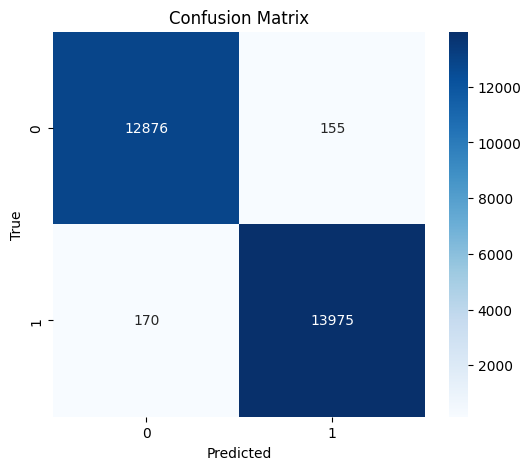

In [ ]:
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'history' is not defined

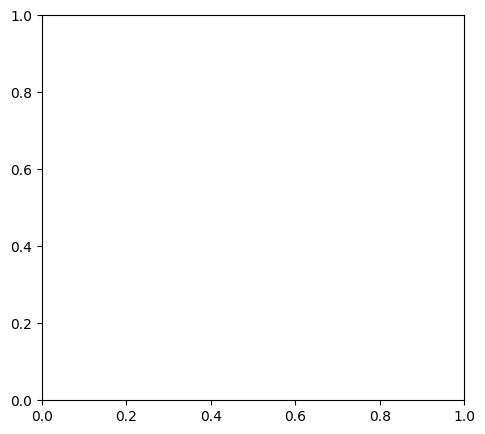

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


In [ ]:
- whos


Variable                     Type          Data/Info
----------------------------------------------------
Adam                         type          <class 'keras.src.optimizers.adam.Adam'>
Bidirectional                type          <class 'keras.src.layers.<...>rectional.Bidirectional'>
Concatenate                  type          <class 'keras.src.layers.<...>concatenate.Concatenate'>
Conv1D                       type          <class 'keras.src.layers.<...>olutional.conv1d.Conv1D'>
Dense                        type          <class 'keras.src.layers.core.dense.Dense'>
Dropout                      type          <class 'keras.src.layers.<...>ization.dropout.Dropout'>
EMAIL_RE                     Pattern       re.compile('[\\w\\.-]+@[\\w\\.-]+\\.\\w+')
EarlyStopping                type          <class 'keras.src.callbac<...>_stopping.EarlyStopping'>
Embedding                    type          <class 'keras.src.layers.<...>ore.embedding.Embedding'>
GlobalMaxPooling1D           type          

In [ ]:
dfe['text'] = dfe['subject'].fillna('') + ' ' + dfe['body'].fillna('')


/tmp/ipython-input-3007464647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['text'] = dfe['subject'].fillna('') + ' ' + dfe['body'].fillna('')


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    dfe,
    test_size=0.2,
    stratify=dfe['label'],
    random_state=42
)


In [ ]:
train_df.shape, val_df.shape


((108700, 5), (27176, 5))

In [ ]:
tokenizer_vocab = 20000


In [ ]:
# assuming tokenizer and tokenizer_vocab already exist
maxlen = 300

X_train = texts_to_padded_sequences(tokenizer, train_df['text'].tolist(),
                                    maxlen=maxlen, num_words=tokenizer_vocab)
X_val = texts_to_padded_sequences(tokenizer, val_df['text'].tolist(),
                                  maxlen=maxlen, num_words=tokenizer_vocab)

y_train = train_df['label'].values
y_val = val_df['label'].values
